# Análisis frecuencial de señales usando ventanas

Desde el punto de vista computacional, la transformada de Fourier en Tiempo Discreto (DTFT), definida como:

$$X(\omega)=\sum_{n=-\infty}^{\infty} x(n)e^{-j\omega n}$$

presenta dos problemas:

- el hecho de que presenta una suma infinita de términos
- en el intervalo fundamental de frecuencias $-\pi\le\omega <\pi$ hay infinitas frecuencias por lo que no puede computarse la transformada para todas las frecuencias

Como consecuencia de la primer afirmación cuando se tienen señales de duración infinita 
pueden aproximarse por señales de duración finita $\tilde x$ que se obtienen multiplicando 
la señal original $x(n)$ por una ventana $w(n)$ de longitud finita $L$. 

Es decir:

$$\tilde x(n)=x(n)w(n)$$

y entonces podemos hacer una aproximación como:

$$X(\omega)\approx \sum_{n=0}^{L-1} \tilde x(n)e^{-j\omega n}$$

y entonces podemos hacer una aproximación como:

$$X(\omega)\approx \sum_{n=0}^{L-1} \tilde x(n)e^{-j\omega n}$$

El problema de las infinitas frecuencias es fácil de resolver
ya que puede computarse en un número finito de frecuencias equi-espaciadas de la forma:

$$\omega_k = \frac{2\pi k}{N}, \quad k= 0, 1, \ldots, N-1$$  

- Si la señal es analógica, la misma se pasa usualmente a través de un **filtro antialiasing**, 
y luego se muestrea con una frecuencia $F_s\le 2B$, 
donde $B$ es el ancho de banda de la señal filtra. 

- La máxima frecuencia en la señal muestreada es $F_s/2$.  

- Luego, por las razones de implementación práctica mencionadas 
se limita la duración de la señal a un intervalo de tiempo $T_0=LT$, 
donde $L$ es el número de muestras y $T=\dfrac{1}{F_s}$ es el periodo de muestreo.

Veremos que la longitud finita de la ventana usada para truncar
la señal pone límite en la **resolución en frecuencia**, 
es decir en la capacidad de distinguir entre dos componentes de frecuencia 
que están separadas  menos de $\dfrac{1}{T_0}=\dfrac{1}{L.T}$ en frecuencia.

**Sea $x(n)$ la señal a analizar.**

Limitar la duración de la señal a $L$ muestras en el intervalo $0\leq n \leq L-1$ 
es equivalente a multiplicar a $x(n)$ por una función ventana rectangular $w(n)$ de longitud $L$, 
es decir:

$$\tilde x(n)=x(n)w(n)$$

donde:

$$w(n)=\left\{ 
 \begin{array}{l}
   1\quad 0\leq n \leq L-1\\
   0\quad \text{coc} 
   \end{array}
   \right.
$$

El espectro de la señal $x(n)$ estará entonces relacionado con el espectro de $\tilde x(n)$ a través de la convolución (periódica)

$$\tilde X(n)=\frac{1}{2\pi}\int_{\infty}^{\infty} X(\lambda)W(\omega-\lambda)d\lambda$$

Es claro entonces que la forma del espectro de la ventana $W(\omega)$ afectará al espectro $\tilde X(\omega)$ con el cuál se quiere
aproximar a $X(\omega)$.

Para comprender mejor esto analicemos en primera instancia el caso de la ventana rectangular. 
Como ya vimos:

$$W(\omega)=e^{\frac{-j\omega(L-1)}{2}}\frac{\sin(\omega L/1}{\sin(\omega/2)}$$


Por lo que:

$$ 
\begin{align}
|W(\omega)|&=\left\{
  \begin{align}
    L \omega=0&\\ 
    \left|\frac{\sin(\omega L/2)}{\sin(\omega/2)}\right|&\quad\text{coc}
    \end{align}
  \right.\\
\angle W(\omega)&=-\frac{\omega}{2}(L-1)+\angle\frac{\sin(\omega L/2)}{\sin(\omega/2)}
\end{align}
$$


De la convolución anterior vemos que para tener:

$$\tilde X(\omega)=X(\omega)$$

deberá ser $W(\omega)=2\pi\delta(\omega)$, para lo cuál $L=\infty$, o sea:

$$\tilde x(n)=x(n)$$

En efecto, calculemos el espectro de una ventana rectangular de longitud infinita, es decir:

$$w(n)=1, \qquad \forall n$$

Podemos ver que la señal es periódica con período $N=1$.
Los coeficientes de su serie de Fourier en TD vienen dados por:


$$c_l=\frac{1}{N}\sum_{n=0}^{N-1}w(n)e^{-j 2\pi ln/N}, \quad \text{con}\quad l=0,1,2,\ldots, N-1$$

Que en esta caso resulta en un único coeficiente:

$$c_0=\sum_{n=0}^{0} w(n)e^{-j2\pi 0n}=1$$

Recordemos que la transformada de Fourier en TD de una señal periódica viene dada por 

$$ W(w)=2\pi \sum_{k=0}^{N-1}c_k\sum_{l=-\infty}^{\infty}\delta\left(\omega-\frac{2\pi k}{N}-2\pi l\right) $$



Para el caso del ejemplo resulta entonces 

$$W(w)=2\pi\sum_{l=-\infty}^{\infty} \delta (\omega - 2\pi l)$$

El hecho de que $W(\omega)$ no sea $\delta(\omega)$ trae varios problemas. Consideremos una secuencia $x(n)$ que consiste de una sola
sinusoide: 

$$x(n)= \cos\omega_0n$$

El espectro de la señal de duración finita $\tilde x(n)$ viene dado por (Teorema de Modulación):

$$\tilde X(n)=\frac{1}{2}\left[W(\omega-\omega_0)W(\omega+\omega_0)\right]$$


Como se ve en la figura anterior el espectro $\tilde X(\omega)$ de no está
localizado en una única frecuencia, sino que está distribuido en todo el rango de frecuencias.

Este fenómeno (debido a la ventana) se denomina **leakage**. 
El ancho del lóbulo principal en el espectro de la ventana determina la resolución en frecuencia.

$$x(n)=\cos(\omega_1n)+\cos(\omega_2n)$$

El espectro de la señal truncada a $L$ muestras en el rango $0\leq n \leq L-1$ es:  

$$\tilde X(\omega) = \frac{1}{2}\left[W(\omega-\omega_1)+W(\omega+\omega_1)+W(\omega-\omega_2)+W(\omega+\omega_2)\right]$$

$$x(n)=\cos(\omega_1n)+\cos(\omega_2n)$$



El espectro de la señal truncada a $L$ muestras en el rango $0\leq n \leq L-1$ es:  

$$\tilde X(\omega) = \frac{1}{2}\left[W(\omega-\omega_1)+W(\omega+\omega_1)+W(\omega-\omega_2)+W(\omega+\omega_2)\right]$$

Como el espectro de $W(\omega)$ tiene el primer cruce por cero en:

$$\omega=\frac{2\pi}{L}$$

Entonces si $|\omega_1-\omega_2| < 4\pi/L$, las dos funciones $W(\omega-\omega_1)$ 
y $W(\omega-\omega_2)$ se superponen y en consecuencia las dos líneas espectrales de 
$x(n)$ no se distinguen.


Sólo si $|\omega_1-\omega_2|\geq 4\pi/L$ 
(donde $4\pi/L$ es el ancho del lóbulo principal del espectro de la ventana rectangular) 
se verán dos lóbulos separados en el espectro $\tilde X(w)$.

Es decir, **la capacidad para distinguir líneas espectrales de diferente**
 **frecuencia está limitada por el ancho del lóbulo principal de la ventana**.


Consideremos ahora el **ejemplo** de una señal con tres componentes sinusoidales, dos de ellas con frecuencias muy próximas. 

$$x(n)= \cos(0.2\omega n) + \cos(0.22\omega n) + \cos(0.6\omega n)$$


El Espectro de Módulo usando ventana rectangular, para $L = 25$, y $L = 50$ resulta

De donde puede observarse que no se distinguen las líneas espectrales 
correspondientes a las frecuencias próximas $\omega_1$ y $\omega_2$.

Si consideramos en cambio $L = 100$, las líneas espectrales son distinguibles.

Para solucionar el problema del *leakage* se propone utilizar una ventana que tenga un espectro que se asemeje en mayor medida al impulso. 
Por ejemplo si consideramos la **ventana de Hann** (`hanning`):

$$
w(n)=\left\{
  \begin{array}{ll}
   \dfrac{1}{2}\left(1-\cos\left(\dfrac{2\pi n}{L}\right)\right)&0\geq n \geq L-1\\
   0 & \text{c.o.c.}
   \end{array}
  \right.
$$

El espectro de módulo tiene las siguientes características:

- Lóbulos laterales significativamente más pequeños que la ventana rectangular (menor leakage)
- Lóbulo principal aproximadamente 2 veces más ancho que la ventana rectangular (peor resolución)

Considerando el ejemplo con las tres componentes senoidales, pero usando una ventana Hann con los mismos valores de $L$jjj, los espectros resultan:

$$
w(n)=\left\{
  \begin{array}{ll}
   \dfrac{1}{2}\left(1-\cos\left(\dfrac{2\pi n}{L}\right)\right)&0\geq n \geq L-1\\
   0 & \text{c.o.c.}
   \end{array}
  \right.
$$
 PONER FIGURAS DE LA VENTANA DE HANN

Otra ventana, con un espectro similar al de la ventana de Hann es la **ventana de Hamming** (`hamming`), que se
muestra a continuación:

$$
w(n)=\left\{
  \begin{array}{ll}
   \left(0.54-0.46\cos\left(\dfrac{2\pi n}{L}\right)\right)&0\geq n \geq L-1\\
   0 & \text{c.o.c.}
   \end{array}
  \right.
$$
 PONER FIGURAS DE LA VENTANA DE HAMMING
 

## Cómputo de la Transformada de Fourier en Tiempo Discreto para señales de longitud finita

Sea $x(n)$ una señal causal de longitud finita $L$. Su DTFT viene dada por:

$$
X(\omega)= \sum_{n=0}^{L-1}x(n)e^{-j\omega n}
$$

Para solucionar el problema de que existen infinitas frecuencias en el intervalo fundamental $-\pi\le\omega<\pi$, calcularemos un número finito $N$ de frecuencias equiespaciadas de la forma

$$\omega_k=\frac{2\pi k}{N}, \quad k=0,1,2,\ldots, N-1$$

Resulta entonces:

$$
X(\omega)= \sum_{n=0}^{L-1}x(n)e^{-j\frac{2\pi k\omega n}{N}},\quad k=0,1,2,\ldots, N-1
$$

que puede escribirse como:

$$X(\omega_0)=x(0)e^{-j\frac{2\pi\times 0\times 0}{N}}+x(1)e^{-j\frac{2\pi\times 0\times 1}{N}}+\cdots+x(N)e^{-j\frac{2\pi\times 0\times (L-1)}{N}}$$
$$x(\omega_1)=x(0)e^{-j\frac{2\pi\times 1\times 0}{n}}+x(1)e^{-j\frac{2\pi\times 1\times 1}{n}}+\cdots+x(n)e^{-j\frac{2\pi\times 1\times (l-1)}{n}}$$
$$\vdots$$
$$x(\omega_{N-1})=x(0)e^{-j\frac{2\pi\times (N-1)\times 0}{n}}+x(1)e^{-j\frac{2\pi\times (N-1)\times 1}{n}}+\cdots+x(n)e^{-j\frac{2\pi\times (N-1)\times (l-1)}{n}}$$

En forma matricial sería:

$$
\begin{bmatrix}
X(\omega_0)\\
X(\omega_1)\\
\vdots\\
X(\omega_{N-1})
\end{bmatrix}=
\begin{bmatrix}
e^{-j\frac{2\pi\times 0\times 0}{N}} & e^{-j\frac{2\pi\times 0\times 1}{N}} & \cdots & e^{-j\frac{2\pi\times (N-1)\times (L-1)}{N}}\\
e^{-j\frac{2\pi\times 1\times 0}{N}} & e^{-j\frac{2\pi\times 1\times 1}{N}} & \cdots & e^{-j\frac{2\pi\times (N-1)\times (L-1)}{N}}\\
\vdots & \vdots & \cdots & \vdots\\
e^{-j\frac{2\pi\times (N-1)\times 0}{N}} & e^{-j\frac{2\pi\times (N-1)\times 1}{N}} & \cdots & e^{-j\frac{2\pi\times (N-1)\times (L-1)}{N}}\\
\end{bmatrix}
\begin{bmatrix}
x(0)\\
x(1)\\
\vdots\\
x(n)
\end{bmatrix}
$$

que es muy facil de implementar con un algoritmo de computación.


In [2]:
import numpy as np
from scipy.fft import fftshift, fftfreq
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def dtft(x, N):
    L=len(x)
    k=np.linspace(0, N, N, endpoint=False)
    k=k.reshape((N,1))
    w=2*np.pi*k/N
    n=np.linspace(0,L,L, endpoint=False)
    n=n.reshape((1,L))
    return (np.exp(-1j*(w@n)))@x, w

In [4]:
# Generamos la señal
L=10
n=np.linspace(0, L, L, endpoint=False).reshape((L,1))
x=0.9**n


In [5]:
N=1024
X, w=dtft(x,N)
w1=fftfreq(N, 1)*2*np.pi

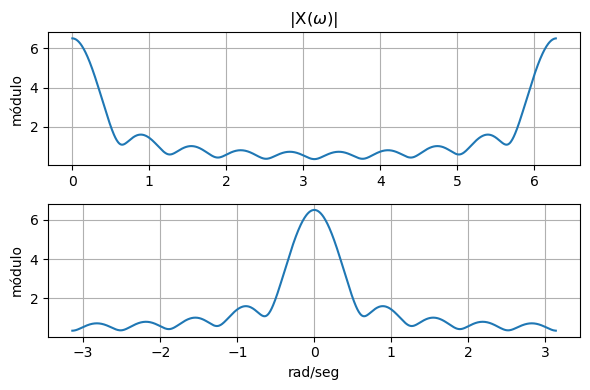

In [6]:
f, ax=plt.subplots(2,1, figsize=(6,4))
ax[0].plot(w, np.abs(X))
ax[0].grid(True)
ax[0].set_ylabel("módulo")
ax[0].set_title(r"|X($\omega$)|");
ax[1].grid(True)
ax[1].set_xlabel("rad/seg")
ax[1].set_ylabel("módulo")
ax[1].plot(fftshift(w1),fftshift(np.abs(X)))
f.tight_layout()


## Transformada ideal


Consideremos ahora la señal de longitud infinita
$$x_1(n)= (0.9)^n\mu(n)$$

Podemos pensar que $x(n)$ en el ejemplo anterior es una versión truncada con una ventana rectangular de longitud $L$ de la señal de longitud infinita $x_1(n)$. Calculemos la DTFT de $x_1(n)$.


Resulta

$$X_1(\omega)=\sum_{n=0}^{\infty}(0.9e^{-j\omega})^n=\frac{1}{1-0.9e^{-j\omega}}$$


Grafiquemos el espectro de módulo de $x_1(n)$ y de $x(n)$ para distintos valores de $L$.

In [7]:
winf=np.linspace(-np.pi,np.pi,1024, endpoint=True)
X1=1/(1-(0.9*(np.exp(-1j*winf))))

L1=10
n1=np.linspace(0, L1, L1, endpoint=False).reshape((L1,1))
xl1=0.9**n1
Xl1,_=dtft(xl1,N)

L2=20
n2=np.linspace(0, L2, L2, endpoint=False).reshape((L2,1))
xl2=0.9**n2
Xl2,_=dtft(xl2,N)

L3=50
n3=np.linspace(0, L3, L3, endpoint=False).reshape((L3,1))
xl3=0.9**n3
Xl3,_=dtft(xl3,N)


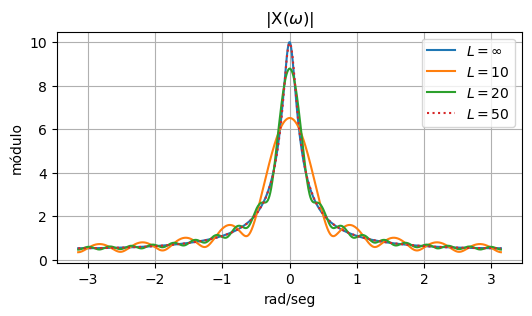

In [8]:
f, ax=plt.subplots(1,1, figsize=(6,3))
ax.plot(winf, np.abs(X1), label=r"$L=\infty$")
ax.plot(winf, np.abs(fftshift(Xl1)),  label=r"$L=10$")
ax.plot(winf, np.abs(fftshift(Xl2)), label=r"$L=20$")
ax.plot(winf, np.abs(fftshift(Xl3)), ls=":", label=r"$L=50$")
ax.grid(True)
ax.set_xlabel("rad/seg")
ax.set_ylabel("módulo")
ax.legend()
ax.set_title(r"|X($\omega$)|");

## Transformada Discreta de Fourier


Vimos que la DTFT de una señal causal $x(n)$, de longitud finita $L$,
calculada en $N$ frecuencias equi-espaciadas de la forma:

$$ \omega_k=\frac{2\pi k}{N}, \quad k=1,2,\cdots, N-1$$

viene dada por:

$$\sum_{n=0}^{L-1}x(n)e^{-j\frac{2\pi kn}{N}}\quad k=1,2,\cdots, N-1$$

Puede pensarse entonces que son muestras del espectro $X(\omega_k)$ son muestras del espectro $X(\omega)$ en las frecuencias $\omega_k$.


Se define entonces la **Transformada Discreta de Fourier con N puntos de la señal $x(n)$** como

$$X(k)\triangleq \sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi kn}{N}}, \quad k=0,1,2,\cdots, N-1$$

Vemos, comparando las expresiones anteriores, que si la señal es de longitud $L\leq N$, 
la Transformada Discreta de Fourier con $N$ puntos puede pensarse como muestras del espectro $X(\omega)$
en las frecuencias equi-espaciadas $\omega_k$. 
Si en cambio no se verifica que $L\leq N$, la DFT con $N$ puntos no puede pensarse como muestras del espectro $X(\omega)$ en $\omega_k$. 

No es difícil probar que la DFT con $N$ puntos $X(k)$ es periódica con período $N$. En efecto:

$$
\begin{array}{ll}
X(k+N)=&\sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi (k+N)n}{N}}\\
&\sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi kn}{N}}\underbrace{e^{-j\frac{2\pi kN}{N}}}_{=1}\\
&\sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi kn}{N}}=X(k)\\
\end{array}
$$

Teniendo en cuenta que $X(k)$ es periódica con período $N$, y
observando la expresión de $X(k)$, notamos que esa
expresión es la Serie de Fourier discreta de $X(k)$, por lo
que podemos concluir que:

$$X(k)\triangleq\sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi kn}{N}}\implies x(n)=c_{-n}$$

siendo $c_{-n}$ los coeficientes de Fourier. 



Finalmente, teniendo en cuenta la expresión de los coeficientes de
Fourier:

$$c_n=\frac{1}{N}\sum_{n=0}^{N-1}X(k)e^{-j\frac{2\pi kn}{N}}\quad n=0,1,\cdots,N-1$$

podemos concluir que

$$x(n)\triangleq \sum_{k=0}^{N-1}X(k)e^{j\frac{2\pi kn}{N}}\quad n=0,1,\cdots,N-1$$

Es decir que, para el caso en que $L\leq N$, la señal $x(n)$ puede
recuperarse a partir de las muestras $X(k)$ según la expresión anterior, 
que se denomina **Transformada Discreta de Fourier
Inversa (IDFT)**.

## Transformada Rápida de Fourier (FFT: Fast Fourier Transform)


El algoritmo desarrollado para el cálculo directo
de la DTFT no es eficiente desde el punto de vista computacional 
ya que requiere del orden de $N^2$ multiplicaciones
complejas. Por ejemplo, si se calculan 1024 frecuencias, se
requerirían 1048576 multiplicaciones.



Si se tienen en cuenta algunas propiedades de simetría de
los coeficientes:

$$e^{-j\frac{2\pi kn}{N}}$$

se pueden desarrollar algoritmos más rápidos.


En particular, uno de los más difundidos es el algoritmo
denominado **Transformada Rápida de Fourier (FFT:
Fast Fourier Transform)** que requiere del orden de

$$\frac{N}{2}\log_2 N$$

multiplicaciones complejas, cuando $N$ es potencia entera de
2. Para el ejemplo de $N = 1024$, resultan 5120 multiplicaciones, 
lo que representa un factor de mejora en la velocidad de 204.8.

En Python, este algoritmo está implementado tanto en los paquetes `scipy` y `numpy`.
La forma de uso es la misma para las dos implementaciones.


In [9]:
# podemos importarla de numpy
from numpy.fft import fft 
# o podemos importarla de scipy
from scipy.fft import fft


La función `fft` se utiliza se utiliza de la siguiente manera:

```python
from scipy.fft import fft
X=fft(x, N)
````

donde: 

- `x` son las muestras de la señal
- `X` son los valores de la transformada
- `N` número de frecuencias donde se calcula la transformada, que debe ser de la forma $N=2^m$ para que el algoritmo sea
rápido.


In [10]:
from scipy.io import loadmat
from scipy.fft import fft, fftshift, fftfreq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:

# importa las variables que estan en el .mat en un diccionario data
data=loadmat('TP3Prob4_2022.mat') 
# extraigo las variables del diccionario
t=data['t'] 
y=data['y']
Fs=data['Fs'][0][0]
Fs

8000

In [12]:
L=len(y);
N=4096*8; # notar que N > L
Y=fft(y, n=N, axis=0);
#F=[-Fs/2:Fs/N:Fs/2-Fs/N]';
F=np.linspace(0, Fs/2, N, endpoint=False)
F=fftfreq(N, 1/Fs)
absY=np.abs(Y)
picomax=np.max(absY)

In [13]:
A=2*picomax/L; # amplitud de la senoide
ind=np.where(absY==picomax)[0][0]

Frecuencia del seno: 199.951171875, amplitud del seno: 1.0056159733403283


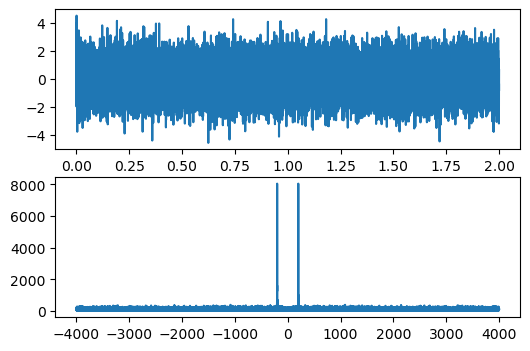

In [14]:
Fsen=F[ind]; # frecuencia de la senoide
f, ax = plt.subplots(2,1, figsize=(6,4))
ax[0].plot(t,y)
ax[1].plot(fftshift(F),fftshift(absY))

print(f"Frecuencia del seno: {Fsen}, amplitud del seno: {A}")

In [15]:
# Filtrado en el dominio FFT
from scipy.fft import ifft
filtro=np.zeros((N,))

for i, val in enumerate(F):
    if np.abs(val)>=199 and np.abs(val)<=201:
        filtro[i]=1


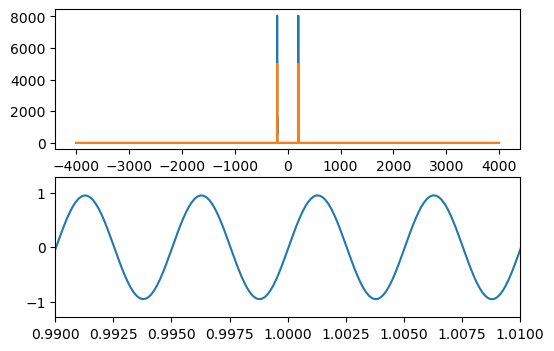

In [16]:
Yfiltrada=Y[:,0]*filtro
yfiltrada=np.real(ifft(Yfiltrada))
yfiltrada=yfiltrada[0:L]
f, ax=plt.subplots(2,1, figsize=(6,4))
ax[0].plot(fftshift(F),abs(fftshift(Yfiltrada)))
ax[0].plot(fftshift(F),5000*fftshift(filtro))
ax[1].set_xlim([0.99, 1.01])
ax[1].plot(t,yfiltrada)

## Uso de `for` y `enumerate` en Python

El `for` en Python se puede utilizar en objetos sobre los cuales se puede *iterar*. 
Estos objetos se dicen que son *iterables*. 

Cuando se itera utilizando un *for* en Python, en cada iteración se va obteniendo 
cada uno de los elemento del objeto sobre el cual se está iterando. 

En el caso del diseño del filtro se quieren eliminar todas 
las componentes de frecuencias que no se corresponden con la del seno que se quiere recuperar.
Es decir, el filtro deberá ser un vector de ceros, 
donde solo sean 1 las componentes que se correspondan con las frecuencias 
en torno a la frecuencia de la senoide ($\approx 200$ Hz).
En nuestro caso decidimos hacer 1 todas las componentes de frecuencia que son mayores a 199 
y menores a 201, tanto positivas como negativas.

Para hacerlo utilizando el bucle `for` recorro el vector de frecuencias $F$ y 
obtengo el indice en `i` y el valor de la frecuencia el `val` mediante el uso
de la función `enumerate`. Si el valor de la frecuencia está entre los seleccionados 
se utiliza el indice `i` para hacer 1 la componente del filtro que se corresponde con la 
frecuencia `val`.

El índice `i` lo utilizo para hacer 1 las componentes del filtro en las frecuencias de interés.

### Ejemplo

Supongamos que que queremos aplicarle una función a cada elemento de un `array` y guardarlo en otro array de igual dimensión y poder graficar los valores del primero respecto del segundo.

Para esto el algoritmo que planteamos podría ser:
- defino la operación que le vamos a aplicar a cada uno de los elementos
- genero un `array` con los valores que le voy a aplicar la función
- aloco un `array` vacio de mismo tamaño que que anterior
- recorro el primer `array` y guardo cada uno de los resultados en el segundo usando el mismo indice para ambos
- realizo la figura


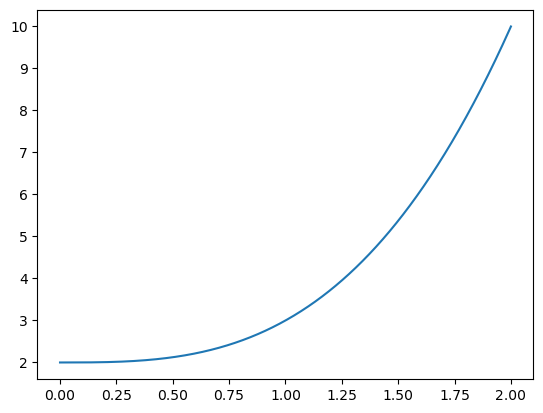

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

def operacion_arbitraria(num):
    return num**3+2


x=np.linspace(0, 2, 1001, endpoint=True)
y=np.empty(x.shape)

for i, v in enumerate(x):
    y[i]=operacion_arbitraria(v)

plt.plot(x, y)